In [3]:
import numpy as np
import os
from skimage.measure import block_reduce
from scipy.misc import imread
import cPickle as pkl
import scipy.signal
import numpy.fft as fft
import sys
import optparse
from libtiff import TIFF
from PIL import Image
import re
import itertools
from scipy import ndimage

import math
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.cm as cm
import pandas as pd

%matplotlib inline

def  cart2pol(x,y, units='deg'):
    """Convert from cartesian to polar coordinates

    :usage:

        theta, radius = pol2cart(x, y, units='deg')

    units refers to the units (rad or deg) for theta that should be returned
    """
    radius= np.hypot(x,y)
    theta= np.arctan2(y,x)
    if units in ['deg', 'degs']:
        theta=theta*180/np.pi
    return theta, radius


def pol2cart(theta, radius, units='deg'):
    """Convert from polar to cartesian coordinates

    usage::

        x,y = pol2cart(theta, radius, units='deg')

    """
    if units in ['deg', 'degs']:
        theta = theta*np.pi/180.0
    xx = radius*np.cos(theta)
    yy = radius*np.sin(theta)

    return xx,yy

In [4]:

threshold = 0.5 #float(options.threshold)

# rev = False #options.rev # CW IS REVERSE

# print "REV STATE: ", rev
get_absolute = True #False #options.get_absolute

key = 'stimulus' #options.key
im_format = '.tif' # '.'+options.im_format
headless = False #options.headless
reduce_factor = (1, 1) #(int(options.reduce_val), int(options.reduce_val))
if reduce_factor[0] > 0:
	reduceit=1
else:
	reduceit=0
gsigma = 0 #int(options.gauss_kernel)
if headless:
	mpl.use('Agg')
	

In [47]:
# outdir = '/media/juliana/TOSHIBA EXT/widefield/CE004/20160203/awake_circle_0013_REV/structs'
# outdir = '/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013_REV/structs'
# outdir = '/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013/structs'
# outdir = '/media/nas/volume1/widefield/data/JR001B/20160507/red_loc2_circle_CW/structs'

outdir = '/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013/structs'

# outdir = '/media/nas/volume1/widefield/data/CE009/20160615/circle_0013Hz_CCW/structs'
# outdir = '/media/nas/volume1/widefield/data/CE009/20160615/circle_0013Hz_CW/structs'


# outdir = '/media/nas/volume1/widefield/data/JR002B/20160616/circle_0013Hz_CW2/structs'
# outdir = '/media/nas/volume1/widefield/data/JR002B/20160616/circle_0013Hz_CCW/structs'

# outdir = '/media/nas/volume1/widefield/data/JR002B/20160618/circle_0026Hz_CCW/structs'


# outdir = '/media/nas/volume1/widefield/data/JR003B/20160621/circle_0013Hz_CW_bin5/structs'
# outdir = '/media/nas/volume1/widefield/data/JR003B/20160625/circle_0008Hz_CW/structs'

# outdir = '/media/nas/volume1/widefield/data/CE014/20160701/circle_0013Hz_CW/structs'

# outdir = '/media/nas/volume1/widefield/data/CE015/20160706/CE015_circle_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/CE015/20160715/CE015_circle_013Hz/structs'


# outdir = '/media/nas/volume1/widefield/data/JR006W/20160715/JR006W_circle_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR006W/20160716/JR006W_circle_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR006W/20160716/JR006W_diam30_circle_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR006W/20160718/JR006W_circle_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR006W/20160718/JR006W_ims_circle_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR006W/20160719/JR006W_ims_circle_013Hz/structs'


# outdir = '/media/nas/volume1/widefield/data/JR006W/20160720/JR006W_ims_circle_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR006W/20160720/JR006W_30cyc_circle_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR014W/20160722/JR014W_noLED_circle_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR014W/20160722/JR014W_circle_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR014W/20160808/JR014W_circle_013Hz/structs'


# outdir = '/media/nas/volume1/widefield/data/JR014W/20160723/JR014W_bin4_ims_circle_013Hz/structs'
# outdir = '/media/nas/volume1/widefield/data/JR014W/20160723/JR014W_bin4_circle_013Hz/structs'

# outdir = '/media/nas/volume1/widefield/data/JR014W/20160723/JR014W_circle_013Hz/structs'


# condkey = '_CCW_'
condkey = '_CCW_'
curr_run = 'run1'


if condkey=='_CCW_':
    CW=False
else:
    CW=True
        #options.rev # CW IS REVERSE

if CW:
    rev=True
else:
    rev=False
    
print "REV STATE: ", CW

if rev=='False' and '_CW' in outdir:
    print "Fixing REV status [CW detected in fn]..."
    CW = True

exptdir = os.path.split(outdir)[0]
sessiondir = os.path.split(exptdir)[0]

print "REV STATE: ", CW


REV STATE:  False
REV STATE:  False


/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013
/media/nas/volume1/widefield/data/CE004/20160203
['figures']
['surface_20160203.tif']
.tif


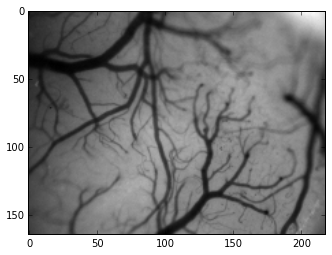

In [48]:
#################################################################################
# GET BLOOD VESSEL IMAGE:
#################################################################################
# folders = os.listdir(rundir)
folders = os.listdir(sessiondir)
figpath = [f for f in folders if f == 'figures']
# figpath = [f for f in folders if f == 'surface']
print exptdir
print sessiondir
print figpath

if figpath:
    figdir = figpath[0]
    tmp_ims = os.listdir(os.path.join(sessiondir, figdir))
    surface_words = ['surface', 'GREEN', 'green', 'Surface', 'Surf']
    ims = [i for i in tmp_ims if any([word in i for word in surface_words])]
    ims = [i for i in ims if '_' in i]
    print ims
    impath = os.path.join(sessiondir, figdir, ims[0])
    # image = Image.open(impath) #.convert('L')
    # imarray = np.asarray(image)
    print os.path.splitext(impath)[1]
    if os.path.splitext(impath)[1] == '.tif':
        tiff = TIFF.open(impath, mode='r')
        surface = tiff.read_image().astype('float')
        tiff.close()
        plt.imshow(surface)
    else:
        image = Image.open(impath) #.convert('L')
        surface = np.asarray(image)


else: # NO BLOOD VESSEL IMAGE...
    surface = np.zeros([200,300])

if reduceit:
    surface = block_reduce(surface, reduce_factor, func=np.mean)


plt.imshow(surface, cmap='gray')

/media/nas/volume1/widefield/data/CE004/20160203/CE004_20160203_surface.png


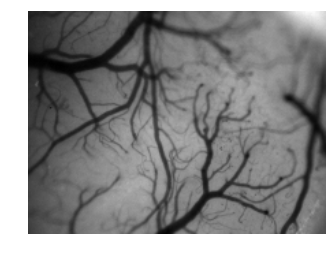

In [107]:
plt.imshow(surface, cmap='gray')
plt.axis('off')
imname = 'CE004_20160203_surface'

savedir = '/media/nas/volume1/widefield/data/CE004/20160203/'

impath = os.path.join(savedir, imname+'.png')
plt.savefig(impath, format='png')
# plt.savefig(impath, format='svg', dpi=1200)
print impath


In [49]:

#################################################################################
# GET DATA STRUCT FILES:
#################################################################################
# append = 'detrend'
append = 'nas'

files = os.listdir(outdir)
# print "all files: ", files
files = [f for f in files if os.path.splitext(f)[1] == '.pkl']
print "ALL files: ", files

# dstructs = [f for f in files if 'Target_fft' in f and str(reduce_factor) and key in f and append in f]

dstructs = [f for f in files if 'Target_fft' in f and str(reduce_factor) and append in f]

print "DSTRUCTS: ", dstructs
# print outdir
D = dict()
for f in dstructs:
	outfile = os.path.join(outdir, f)
	with open(outfile,'rb') as fp:
		D[f] = pkl.load(fp)
# print D.keys()


# cw_key = D.keys()[0]

astructs = [f for f in files if 'Amplitudes' in f]
A = dict()
for f in astructs:
	outfile = os.path.join(outdir, f)
	with open(outfile,'rb') as fp:
		A[f] = pkl.load(fp)
# print A.keys()

# condkey = '_CW_'
condkey = '_stimulus'
d_key = [i for i in D.keys() if condkey in i][0]
# a_key = [i for i in A.keys() if condkey in i][0]

# d_key = [i for i in D.keys() if condkey in i and curr_run in i][0]
# a_key = [i for i in A.keys() if condkey in i and curr_run in i][0]
# blank_key = [i for i in D.keys() if 'blank' in i][0]

print 'CURRENT KEYS:'
print d_key
# print a_key
# print "BLANKS: ", blank_key

ALL files:  ['D_fft_stimulus_(2, 2).pkl', 'Target_fft_stimulus_(1, 1)_nas.pkl', 'Target_fft_stimulus_(1, 1)_nas_DC.pkl', 'Amplitudes_stimulus_(1, 1)_ratio.pkl', 'D_target_stimulus_(2, 2).pkl', 'Target_fft_stimulus_(1, 1)_detrendfirst.pkl', 'Amplitudes_stimulus_(1, 1)_fft.pkl']
DSTRUCTS:  ['Target_fft_stimulus_(1, 1)_nas.pkl', 'Target_fft_stimulus_(1, 1)_nas_DC.pkl']
CURRENT KEYS:
Target_fft_stimulus_(1, 1)_nas_DC.pkl


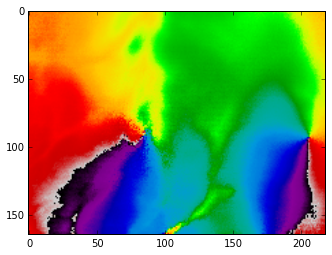

In [50]:
plt.imshow(D[curr_key]['phase_map'], cmap='spectral', vmin=-1*math.pi, vmax=math.pi)


['phase_map', 'DC', 'dynrange', 'DC_mag', 'DC_phase', 'mag_map', 'target_freq', 'binsize', 'degrees', 'fps', 'mean_intensity', 'DC_freq', 'direction', 'shift_degrees', 'ft', 'DC_bin', 'strt_idxs', 'reduce_factor', 'target_bin', 'nframes_per_cycle', 'positions', 'freqs']
/media/nas/volume1/widefield/data/CE004/20160203/FIG_CCW_legend.svg


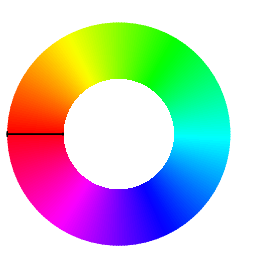

In [114]:
curr_key = d_key

print D[curr_key].keys()

# # SAVE PHASE:
# plt.imshow(D[curr_key]['phase_map'], cmap='hsv', vmin=-1*math.pi, vmax=math.pi)
# plt.axis('off')

# imname = 'FIG_CCW_phase'

# # outdir = '/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013_REV/
# savedir = '/media/nas/volume1/widefield/data/CE004/20160203/'

# impath = os.path.join(savedir, imname+'.png')
# plt.savefig(impath, format='png')
# print impath


# SAVE POWER:
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# power_map = np.log10(D[curr_key]['mag_map']**2)

# ax = plt.gca()
# plt.axis('off')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# im = ax.imshow(power_map, cmap='hot', vmax=12)
# plt.colorbar(im, cax=cax, cmap='hot')


# imname = 'FIG_CCW_power'

# outdir = '/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013_REV/
# savedir = '/media/nas/volume1/widefield/data/CE004/20160203/'

# impath = os.path.join(savedir, imname+'.png')
# plt.savefig(impath, format='png')
# print impath


# LEGEND:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='polar')
ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...

# if CW:
#     ax._direction = 2*np.pi # object moves toward bottom first (CW)
# else:
ax._direction = -2*np.pi # objecct moves toward top first (CCW)

norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
#norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('hsv'),
                                norm=norm, orientation='horizontal')
# cb.ax.invert_xaxis()
# cb.outline.set_visible(False)
# ax.set_axis_off()
ax.set_rlim([-1, 1])
ax.axis('off')
# plt.show()

imname = 'FIG_CCW_legend'

outdir = '/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013_REV/'
savedir = '/media/nas/volume1/widefield/data/CE004/20160203/'

impath = os.path.join(savedir, imname+'.svg')
plt.savefig(impath, format='svg')
print impath

In [8]:
# curr_key = cw_key

cw_key = 'Target_fft_CW_run1_(1, 1)_.pkl'
ccw_key = 'Target_fft_CCW_run1_(1, 1)_.pkl'

print "D keys:"
print D[d_key].keys()

print "A keys:"
print A[a_key].keys()

print "BLANK:"
D[blank_key].keys()

D keys:
['phase_map', 'DC', 'dynrange', 'DC_mag', 'DC_phase', 'mag_map', 'target_freq', 'binsize', 'degrees', 'fps', 'mean_intensity', 'DC_freq', 'direction', 'shift_degrees', 'ft', 'DC_bin', 'strt_idxs', 'reduce_factor', 'target_bin', 'nframes_per_cycle', 'positions', 'freqs']
A keys:
['ft', 'ratio_map', 'target_freq', 'freqs', 'binsize', 'dB_map', 'fps', 'reduce_factor', 'nframes', 'target_bin']
BLANK:


['phase_map',
 'DC',
 'dynrange',
 'DC_mag',
 'DC_phase',
 'mag_map',
 'target_freq',
 'binsize',
 'degrees',
 'fps',
 'mean_intensity',
 'DC_freq',
 'direction',
 'shift_degrees',
 'ft',
 'DC_bin',
 'strt_idxs',
 'reduce_factor',
 'target_bin',
 'nframes_per_cycle',
 'positions',
 'freqs']

NameError: name 'extent' is not defined

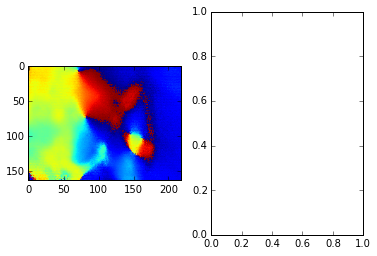

In [9]:
# Get the stuffs.

ratio_map = A[a_key]['ratio_map']
phase_map = np.angle(D[d_key]['ft'])

plt.subplot(1,2,1)
plt.imshow(phase_map)

plt.subplot(1,2,2)
# C = plt.contour(phase_map)
# # plt.imagesc(C)

levels = np.arange(-2.0, 1.601, 0.4)  # Boost the upper limit to avoid truncation errors.

# norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
norm = cm.colors.Normalize(vmax=1*math.pi, vmin=-1*math.pi)
cmap = cm.PRGn

# im = plt.imshow(phase_map, origin='upper', extent=extent, cmap=cm.get_cmap(cmap, len(levels) - 1), norm=norm)
# ylim = plt.get(plt.gca(), 'ylim')
# plt.setp(plt.gca(), ylim=ylim[::-1])
v = plt.axis()

# To avoid discretization error, use either this number or a large number such as the default (256).
cset1 = plt.contourf(phase_map, levels, origin='upper', extent=extent,
                 cmap=cm.get_cmap(cmap, len(levels) - 1),
                 norm=norm,
                 )


# If we want lines as well as filled regions, we need to call
# contour separately; don't try to change the edgecolor or edgewidth
# of the polygons in the collections returned by contourf.
# Use levels output from previous call to guarantee they are the same.
cset2 = plt.contour(phase_map, cset1.levels,  origin='upper',
                colors='k',
                hold='on')

# We don't really need dashed contour lines to indicate negative
# regions, so let's turn them off.
for c in cset2.collections:
    c.set_linestyle('solid')

# # It is easier here to make a separate call to contour than
# # to set up an array of colors and linewidths.
# # We are making a thick green line as a zero contour.
# # Specify the zero level as a tuple with only 0 in it.
# cset3 = plt.contour(phase_map, (0,),
#                 colors='r',
#                 linewidths=2,
#                 hold='on')
# plt.title('Filled contours')
# plt.colorbar(cset1)
# #hot()


# im = plt.imshow(phase_map, origin='upper', extent=extent, cmap=cmap, norm=norm)
# # ylim = plt.get(plt.gca(), 'ylim')
# # plt.setp(plt.gca(), ylim=ylim[::-1])
# v = plt.axis()
# plt.contour(phase_map, levels, hold='on', colors='k',
#         origin='upper', extent=extent)
# plt.axis(v)

<matplotlib.colorbar.Colorbar instance at 0x7fa65a20c1b8>

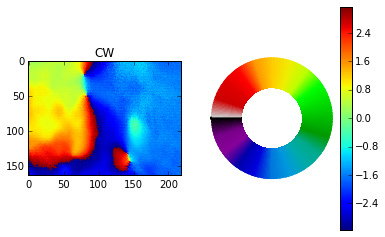

In [17]:
CW_phase = D[cw_key]['phase_map']
CW_phase_invert = CW_phase + math.pi

fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(CW_phase)
plt.title('CW')
ax = fig.add_subplot(1,2,2, projection='polar')
ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...
ax._direction = 2*np.pi # object moves toward bottom first (CW)
norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('spectral'),
                                norm=norm, orientation='horizontal')
ax.set_rlim([-1, 1])
ax.axis('off')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fa65992bd88>

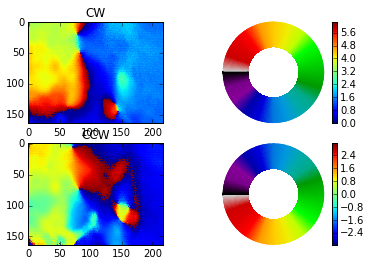

In [20]:
CW_phase = D[cw_key]['phase_map']
CCW_phase = D[ccw_key]['phase_map']

CW_phase_invert = CW_phase + np.pi

fig = plt.figure()
plt.subplot(2,2,1)

plt.imshow(CW_phase_invert)
plt.title('CW')

ax = fig.add_subplot(2,2,2, projection='polar')
ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...
ax._direction = 2*np.pi # object moves toward bottom first (CW)
norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('spectral'),
                                norm=norm, orientation='horizontal')
ax.set_rlim([-1, 1])
ax.axis('off')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(CCW_phase)
plt.title('CCW')
ax = fig.add_subplot(2,2,4, projection='polar')
ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...
ax._direction = -2*np.pi # objecct moves toward top first (CCW)
norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('spectral'),
                                norm=norm, orientation='horizontal')
ax.set_rlim([-1, 1])
ax.axis('off')
plt.colorbar()

(0.0, 218.0, 0.0, 164.0)

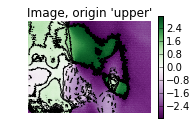

In [10]:

extent = (0, phase_map.shape[1], 0, phase_map.shape[0])


plt.subplot(2, 2, 3)

im = plt.imshow(phase_map, origin='upper', extent=extent, cmap=cmap, norm=norm)
# ylim = plt.get(plt.gca(), 'ylim')
# plt.setp(plt.gca(), ylim=ylim[::-1])
v = plt.axis()
plt.contour(phase_map, levels, hold='on', colors='k',
        origin='upper', extent=extent)
plt.axis(v)

plt.title("Image, origin 'upper'")
plt.colorbar(im)
plt.axis('off')
# plt.subplot(2, 2, 4)

# # We will use the interpolation "nearest" here to show the actual
# # image pixels.
# # Note that the contour lines don't extend to the edge of the box.
# # This is intentional. The Z values are defined at the center of each
# # image pixel (each color block on the following subplot), so the
# # domain that is contoured does not extend beyond these pixel centers.
# im = plt.imshow(phase_map, interpolation='nearest', extent=extent, cmap=cmap, norm=norm)
# v = plt.axis()
# plt.contour(phase_map, levels, hold='on', colors='k',
#         origin='image', extent=extent)
# plt.axis(v)
# ylim = plt.get(plt.gca(), 'ylim')
# plt.setp(plt.gca(), ylim=ylim[::-1])
# plt.title("Image, origin from rc, reversed y-axis")
# plt.colorbar(im)

# plt.show()

Nyquist:  4614.0


<matplotlib.colorbar.Colorbar instance at 0x7fa65af3c6c8>

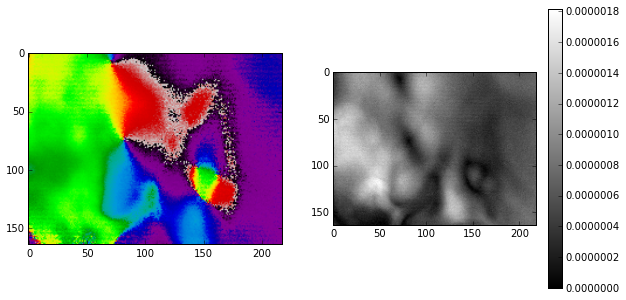

In [11]:
# NORMALIZE to HSV:

Ny = len(D[d_key]['freqs'])/2.
print "Nyquist: ", Ny
old_min = -math.pi #phase_map.min()
old_max = math.pi #phase_map.max()
new_min = 0
new_max = 1
normed_phase_map = np.zeros(phase_map.shape)
for x in range(phase_map.shape[0]):
    for y in range(phase_map.shape[1]):
        old_val = phase_map[x, y]
        normed_phase_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

# old_min = mag_map.min()
# old_max = mag_map.max()
# new_min = 0
# new_max = 1
# normed_mag_map = np.zeros(mag_map.shape)
# for x in range(mag_map.shape[0]):
#     for y in range(mag_map.shape[1]):
#         old_val = mag_map[x, y]
#         normed_mag_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(normed_phase_map, cmap='spectral')

plt.subplot(1,2,2)
plt.imshow(ratio_map/Ny, cmap='gray')
plt.colorbar()

8.0615618743e-09
2.38907564051e-06


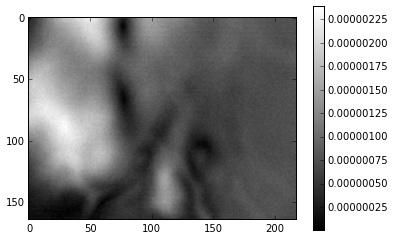

In [1464]:

hue = normed_phase_map
sat = np.ones(hue.shape)
val = ratio_map/Ny #normed_mag_map

HSV = np.ones(val.shape + (3,))
HSV[...,0] = hue
HSV[...,2] = sat * -0.05
HSV[...,1] = val

plt.imshow(val, cmap='gray')
plt.colorbar()

print val.min()
print val.max()


In [1465]:
# import copy
# cutoff = .3*max(normed_mag_map.ravel())
# print "Cutoff at: ", cutoff
# # thresh_val = copy.deepcopy(val)
# nons = []
# for x in range(val.shape[0]):
#     for y in range(val.shape[1]):
# #         print thresh_val[x, y]
#         if val[x, y] < cutoff:
#             nons.append([x,y])
# print len(nons)

# HSV TO RGB:

import colorsys
hsv_to_rgb = np.empty(HSV.shape)

for i in range(HSV.shape[0]):
    for j in range(HSV.shape[1]):

            hsv_to_rgb[i, j, :] = colorsys.hsv_to_rgb(HSV[i,j,:][0],HSV[i,j,:][1],HSV[i,j,:][2])


-0.05 -0.0499998805462


(0.0, 6.2831853071795862, -1.0, 1.0)

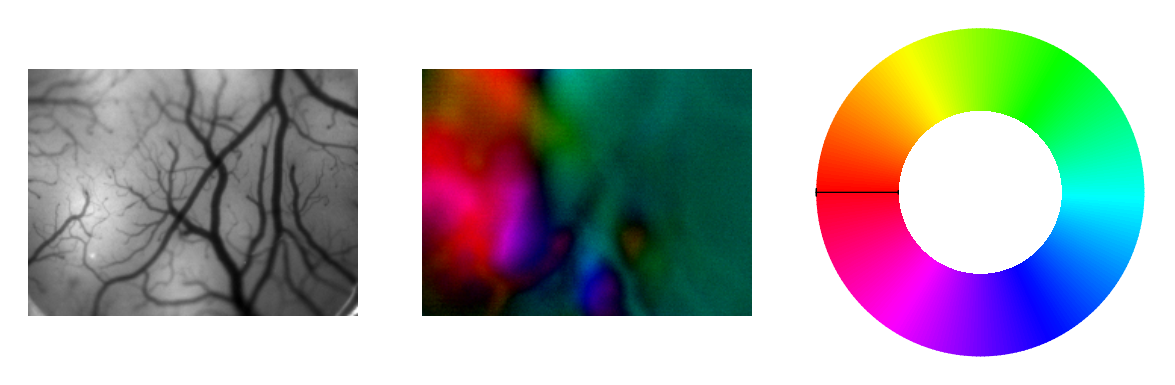

In [1466]:
# MASK:

curr_key = d_key

print hsv_to_rgb.min(), hsv_to_rgb.max()

old_min = hsv_to_rgb.min()
old_max = hsv_to_rgb.max()
new_min = 0
new_max = 1
renorm_rgb = np.zeros(hsv_to_rgb.shape)
for x in range(hsv_to_rgb.shape[0]):
    for y in range(hsv_to_rgb.shape[1]):
        old_val = hsv_to_rgb[x, y]
        renorm_rgb[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,3,1)
plt.imshow(surface, 'gray')
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(surface, 'gray')
plt.imshow(renorm_rgb, 'hsv') #, vmin=0, vmax=1)
plt.axis('off')
# plt.colorbar()


# plt.colorbar()



ax = fig.add_subplot(1,3,3, projection='polar')
ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...

if CW:
    ax._direction = 2*np.pi # object moves toward bottom first (CW)
else:
    ax._direction = -2*np.pi # objecct moves toward top first (CCW)

norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
#norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('hsv'),
                                norm=norm, orientation='horizontal')
# cb.ax.invert_xaxis()
# cb.outline.set_visible(False)
# ax.set_axis_off()
ax.set_rlim([-1, 1])
ax.axis('off')


# # SAVE

# imname = "PHASE_map_HSV_%s_%s" % (a_key, curr_key)
# savedir = os.path.split(outdir)[0]
# # impath = os.path.join(savedir, imname+'.svg')
# # plt.savefig(impath, format='svg', dpi=1200)

# # impath = os.path.join(savedir, imname+'.png')
# # plt.savefig(impath, format='png')

# savedir = os.path.split(outdir)[0]
# figdir = os.path.join(savedir, 'figures')
# if not os.path.exists(figdir):
#     os.makedirs(figdir)
    
# impath = os.path.join(figdir, imname+'.png')
# plt.savefig(impath, format='png')

# print impath


0.0
1.0


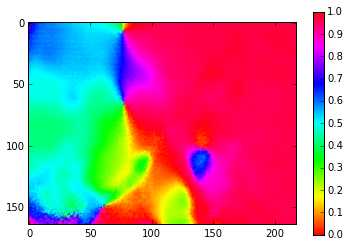

In [1467]:
Ny = len(D[curr_key]['freqs'])/2.
fig = plt.figure()
mag_map = D[curr_key]['mag_map'] / Ny
phase_map = D[curr_key]['phase_map']

plt.imshow(phase_map)

old_min = -math.pi #phase_map.min()
old_max = math.pi #phase_map.max()
new_min = 0
new_max = 1
normed_phase_map = np.zeros(phase_map.shape)
for x in range(phase_map.shape[0]):
    for y in range(phase_map.shape[1]):
        old_val = phase_map[x, y]
        normed_phase_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

old_min = mag_map.min()
old_max = mag_map.max()
new_min = 0
new_max = 1
normed_mag_map = np.zeros(mag_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
        old_val = mag_map[x, y]
        normed_mag_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


hue = normed_phase_map
sat = np.ones(hue.shape)
val = normed_mag_map

HSV = np.ones(val.shape + (3,))
HSV[...,0] = hue
HSV[...,2] = sat * 1
HSV[...,1] = val

plt.imshow(normed_phase_map, cmap='hsv')
plt.colorbar()

print normed_mag_map.min()
print normed_mag_map.max()

Cutoff at:  0.3
22512
(164, 218)


<matplotlib.colorbar.Colorbar instance at 0x7f595f256cf8>

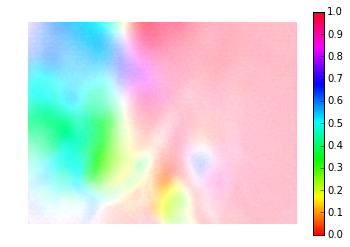

In [1468]:
# MAKE HSV:

import copy
cutoff = .3*max(normed_mag_map.ravel())
print "Cutoff at: ", cutoff
# thresh_val = copy.deepcopy(val)
nons = []
for x in range(val.shape[0]):
    for y in range(val.shape[1]):
#         print thresh_val[x, y]
        if val[x, y] < cutoff:
            nons.append([x,y])
print len(nons)



import colorsys
convmap = np.empty(HSV.shape)

for i in range(HSV.shape[0]):
    for j in range(HSV.shape[1]):

            convmap[i, j, :] = colorsys.hsv_to_rgb(HSV[i,j,:][0],HSV[i,j,:][1],HSV[i,j,:][2])

            
# MASK:

alpha_channel = np.ones(convmap[:,:,1].shape)
print alpha_channel.shape
for i in nons:
    alpha_channel[i[0], i[1]] = 1

composite = np.empty((alpha_channel.shape[0], alpha_channel.shape[1], 4))
composite[:,:,0:3] = convmap[:,:,:]

composite[:,:,3] = alpha_channel

plt.imshow(surface, 'gray')
plt.imshow(composite, 'hsv') #, vmin=0, vmax=1)
plt.axis('off')
plt.colorbar()

(0.0, 6.2831853071795862, -1.0, 1.0)

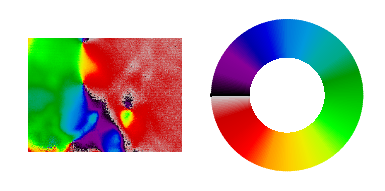

In [1469]:
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(np.angle(D[curr_key]['ft']), cmap='spectral')
plt.axis('off')

ax = fig.add_subplot(1,2,2, projection='polar')
ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...

if CW:
    ax._direction = 2*np.pi # object moves toward bottom first (CW)
else:
    ax._direction = -2*np.pi # objecct moves toward top first (CCW)

norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
#norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('spectral'),
                                norm=norm, orientation='horizontal')
# cb.ax.invert_xaxis()
# cb.outline.set_visible(False)
# ax.set_axis_off()
ax.set_rlim([-1, 1])
ax.axis('off')

Target_fft_CCW_run1_(1, 1)_.pkl
(164, 218)
/media/nas/volume1/widefield/data/JR014W/20160722/JR014W_circle_013Hz/figures/CCW_phase_overlay_withkey_blank_threshold0.50.png
/media/nas/volume1/widefield/data/JR014W/20160722/JR014W_circle_013Hz/figures/CCW_phase_overlay_withkey_blank_threshold0.50.png


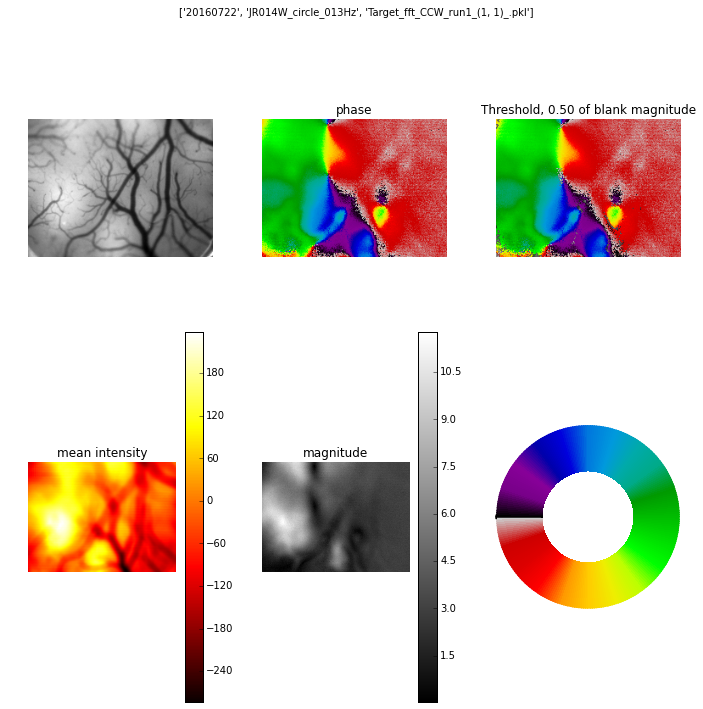

In [1470]:
# curr_key = d_key # a_key # blank_key
print curr_key

threshold_type = 'blank'
# threshold_type = 'blank'
# threshold_type = 'magmax'

# use_mean_intensity = 0 # set to 1 if want to threshold with mean intensity values instead of magnitude
# use_log = 0
# use_DC = 1
# use_blank = 
# use_ratio = 0

threshold = .5


Ny = len(D[curr_key]['freqs'])/2.
mag_map = D[curr_key]['mag_map']/Ny
phase_map = D[curr_key]['phase_map']

DC_mag_map = D[curr_key]['DC_mag']/Ny
blank_mag_map = D[blank_key]['mag_map']/Ny


date = os.path.split(os.path.split(os.path.split(outdir)[0])[0])[1]
experiment = os.path.split(os.path.split(outdir)[0])[1]

#-----------------------------------------------------------------
# Overlaid Phase-map, thresholded
#-----------------------------------------------------------------

fig = plt.figure(figsize=(10,10))

fig.add_subplot(2,3,1)
plt.imshow(surface,cmap=cm.Greys_r)
plt.axis('off')

fig.add_subplot(2,3,2)
plt.imshow(phase_map, cmap='spectral')
plt.axis('off')
plt.title('phase')

fig.add_subplot(2,3,3)
plt.imshow(surface,cmap=cm.Greys_r)
print surface.shape

# if use_mean_intensity:
#     mean_intensity = D[curr_key]['mean_intensity']
#     [x, y] = np.where(mean_intensity >= threshold*mean_intensity.max())
#     phase_mask = np.ones(mean_intensity.shape) * 100
#     # phase_mask[x, y] = phase_map[x, y]
#     phase_mask[x, y] = D[curr_key]['phase_map'][x, y]
#     tit = 'Threshold, %.2f of mean intensity max' % (threshold)
#     threshold_type = 'intensity'

# elif use_log:
# #     if use_log:
#     [x, y] = np.where(np.log(mag_map) >= threshold * np.log(mag_map.max()))
# #     else:
# #         [x, y] = np.where(mag_map >= threshold * mag_map.max())
#     phase_mask = np.ones(mag_map.shape) * 100
#     phase_mask[x, y] = phase_map[x, y]
#     tit = 'Threshold, %.2f of log max magnitude' % (threshold)
#     threshold_type = 'logmagmax'
    
# elif use_DC:

# if use_DC:
#     [x, y] = np.where(mag_map >= threshold*np.array(DC_mag_map+0.2))
#     phase_mask = np.ones(DC_mag_map.shape) * 100
#     phase_mask[x, y] = phase_map[x, y]
#     tit = 'Threshold, %.2f of DC magnitude' % (threshold)
#     threshold_type = 'DCmag'

# elif use_blank:
#     blank_mag_map = D[blank_key]['mag_map']/Ny
#     [x, y] = np.where(mag_map >= threshold*np.array(blank_mag_map))
#     phase_mask = np.ones(blank_mag_map.shape) * 100
#     phase_mask[x, y] = phase_map[x, y]
#     tit = 'Threshold, %.2f of BLANK magnitude' % (threshold)
#     threshold_type = 'blankmag'
    
# elif use_ratio:
#     [x, y] = np.where(mag_map/blank_mag_map >= 2)
#     phase_mask = np.ones(blank_mag_map.shape) * 100
#     phase_mask[x, y] = phase_map[x, y]
#     tit = 'Threshold, %.2f of BLANK magnitude' % (threshold)
#     threshold_type = 'blankmag'

old_min = mag_map.min()
old_max = mag_map.max()
new_min = 0
new_max = 1
normed_mag_map = np.zeros(mag_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
        old_val = mag_map[x, y]
        normed_mag_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

        
if use_DC:
    thresh_map = DC_map
elif use_blank:
    thresh_map = blank_map

old_min = thresh_map.min()
old_max = thresh_map.max()
new_min = 0
new_max = 1
normed_thresh_map = np.zeros(thresh_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(thresh_map.shape[1]):
        old_val = thresh_map[x, y]
        normed_thresh_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

        
# [x, y] = np.where(mag_map >= threshold*thresh_map)
[x, y] = np.where(normed_mag_map >= threshold*normed_thresh_map)

phase_mask = np.ones(thresh_map.shape) * 100
phase_mask[x, y] = phase_map[x, y]
tit = 'Threshold, %.2f of %s magnitude' % (threshold, threshold_type)
# threshold_type = 'DCmag'
    
[nullx, nully] = np.where(phase_mask == 100)
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')
plt.title(tit)

#-----------------------------------------------------------------
# LEGEND
#-----------------------------------------------------------------

ax = fig.add_subplot(2,3,6, projection='polar')
ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...

if CW:
    ax._direction = 2*np.pi # object moves toward bottom first (CW)
else:
    ax._direction = -2*np.pi # objecct moves toward top first (CCW)

norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
#norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('spectral'),
                                norm=norm, orientation='horizontal')
# cb.ax.invert_xaxis()
# cb.outline.set_visible(False)
# ax.set_axis_off()
ax.set_rlim([-1, 1])
ax.axis('off')


fig.add_subplot(2,3,4) # MEAN INTENSITY:
mean_intensity = D[curr_key]['mean_intensity']
plt.imshow(mean_intensity, cmap='hot')
plt.axis('off')
plt.colorbar()
plt.title('mean intensity')

fig.add_subplot(2,3,5) # MAGNITUDE
plt.imshow(mag_map, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.title('magnitude')

plt.tight_layout()

plt.suptitle([date, experiment, curr_key])


if CW:
    imname = 'CW_phase_overlay_withkey_%s_threshold%.2f' % (threshold_type, threshold)
else:
    imname = 'CCW_phase_overlay_withkey_%s_threshold%.2f' % (threshold_type, threshold)
# impath = os.path.join(outdir, imname+'.eps')
# plt.savefig(impath, format='svg', dpi=1200)

# impath = os.path.join(savedir, imname+'.png')
# plt.savefig(impath, format='png')

savedir = os.path.split(outdir)[0]
figdir = os.path.join(savedir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
impath = os.path.join(figdir, imname+'.png')
plt.savefig(impath, format='png')
print impath


print impath

mag range:  0.0325500185385 11.7796223937
phase range:  -3.14159179518 3.14159263831
HUE range:  1.36620152853e-07 0.999999997568
VAL range:  0.0 1.0
Cutoff at:  0.5
N pixels below threshold:   3919
HSV range:  0.0 1.0
/media/nas/volume1/widefield/data/JR014W/20160722/JR014W_circle_013Hz/figures/pastel_blank_thresh50%_MASKED_HSV_Amplitudes_CCW_run1_(1, 1)__Target_fft_CCW_run1_(1, 1)_.png


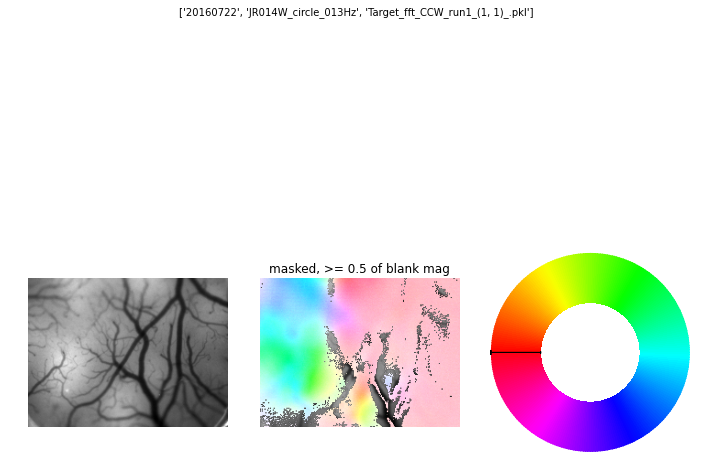

In [1471]:

# THIS SEEMS TO WORK BETTER (FROM BOTTOM OF CIRC jnb)

# thresh_method = 'magmax'
# thresh_method = 'DC'
# thresh_method = 'blank'

# cutoff_val = 2

# use_mag_max = 0
# use_DC = 0
# use_blank = 1

curr_key = d_key

Ny = len(D[curr_key]['freqs'])/2.

fig = plt.figure()
mag_map = D[curr_key]['mag_map'] / Ny
phase_map = D[curr_key]['phase_map']

DC_map = D[curr_key]['DC_mag']/Ny
blank_map = D[blank_key]['mag_map']/Ny

print "mag range: ", mag_map.min(), mag_map.max()
print "phase range: ", phase_map.min(), phase_map.max()


# Get normed PHASE map for stimulation condN for HSV composite:

old_min = -math.pi #phase_map.min()
old_max = math.pi #phase_map.max()
new_min = 0
new_max = 1
normed_phase_map = np.zeros(phase_map.shape)
for x in range(phase_map.shape[0]):
    for y in range(phase_map.shape[1]):
        old_val = phase_map[x, y]
        normed_phase_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


# Get normed MAGNITUDE map for stimulation condN for HSV composite:
old_min = mag_map.min()
old_max = mag_map.max()
new_min = 0
new_max = 1
normed_mag_map = np.zeros(mag_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
        old_val = mag_map[x, y]
        normed_mag_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

        
# CHOOSE MAG METHOD TO THRESHOLD OFF OF:

import copy

if threshold_type=='magmax':
    thresh_map = copy.deepcopy(mag_map)
    plot_title = 'masked, >= %s of mag max' % str(threshold)
elif threshold_type=='DC':
    thresh_map = copy.deepcopy(DC_map)
    plot_title = 'masked, >= %s of DC mag' % str(threshold)
elif threshold_type=='blank':
    thresh_map = copy.deepcopy(blank_map)
    plot_title = 'masked, >= %s of blank mag' % str(threshold)

    
# # NORMALIZE THERSHOLD MAP???
old_min = thresh_map.min()
old_max = thresh_map.max()
new_min = 0
new_max = 1
normed_thresh_map = np.zeros(thresh_map.shape)
for x in range(thresh_map.shape[0]):
    for y in range(thresh_map.shape[1]):
        old_val = thresh_map[x, y]
        normed_thresh_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


hue = normed_phase_map
sat = np.ones(hue.shape)
val = normed_mag_map

print "HUE range: ", hue.min(), hue.max()
print "VAL range: ", val.min(), val.max()

HSV = np.ones(val.shape + (3,))
HSV[...,0] = hue
HSV[...,2] = sat * 1
HSV[...,1] = val

# plt.imshow(normed_phase_map, cmap='hsv')
# plt.colorbar()

# print normed_mag_map.min()
# print normed_mag_map.max()


## REMOVE BELOW THRESH:

print "Cutoff at: ", threshold

nons = []
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
#         if mag_map[x, y] < thresh_map[x, y]*cutoff_val:
#         if normed_mag_map[x, y] < normed_thresh_map[x, y]*cutoff_val:
        if not normed_mag_map[x, y] >= normed_thresh_map[x, y]*threshold:
            nons.append([x,y])
        
# NOTE ON THRESHOLDING:
# If use normed-mag against normed-threshold-map, get good removal of baddies.
# BUT, if use actual mag-map values against actual blank/DC map conditions, too much stuff gets included...

                
print "N pixels below threshold:  ", len(nons)

##
# HSV TO RGB:

import colorsys
convmap = np.empty(HSV.shape)

for i in range(HSV.shape[0]):
    for j in range(HSV.shape[1]):

            convmap[i, j, :] = colorsys.hsv_to_rgb(HSV[i,j,:][0], HSV[i,j,:][1], HSV[i,j,:][2])
            
print "HSV range: ", HSV.min(), HSV.max()
# print convmap[i,j,:]
# print convmap.min()

##
# MASK:

alpha_channel = np.ones(convmap[:,:,1].shape)
# print alpha_channel.shape
for i in nons:
    alpha_channel[i[0], i[1]] = 0

composite = np.empty((alpha_channel.shape[0], alpha_channel.shape[1], 4))
composite[:,:,0:3] = convmap[:,:,:]

composite[:,:,3] = alpha_channel


# PLOT:


# MAKE AND SAVE FIGURE:

date = os.path.split(os.path.split(os.path.split(outdir)[0])[0])[1]
experiment = os.path.split(os.path.split(outdir)[0])[1]
        
fig = plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(surface, 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(surface, 'gray')
plt.imshow(composite, 'hsv')
plt.axis('off')
plt.title(plot_title)
# plt.colorbar()

# plt.subplot(1,3,3)
# plt.imshow(legend, cmap='hsv')
# plt.axis('off')
ax = fig.add_subplot(1,3,3, projection='polar')
ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...

if CW:
    ax._direction = 2*np.pi # object moves toward bottom first (CW)
else:
    ax._direction = -2*np.pi # objecct moves toward top first (CCW)

norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
#norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('hsv'),
                                norm=norm, orientation='horizontal')
# cb.ax.invert_xaxis()
# cb.outline.set_visible(False)
# ax.set_axis_off()
ax.set_rlim([-1, 1])
ax.axis('off')



plt.suptitle([date, experiment, curr_key])

plt.tight_layout()
    
# impath = os.path.join(outdir, imname+'.svg')
# plt.savefig(impath, format='svg', dpi=1200)


imname = "pastel_%s_thresh%s%%_MASKED_HSV_%s_%s" % (threshold_type, str(int(threshold*100)), os.path.splitext(a_key)[0], os.path.splitext(curr_key)[0])

savedir = os.path.split(outdir)[0]
figdir = os.path.join(savedir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
impath = os.path.join(figdir, imname+'.png')
plt.savefig(impath, format='png')
print impath



<matplotlib.colorbar.Colorbar instance at 0x7f595e887440>

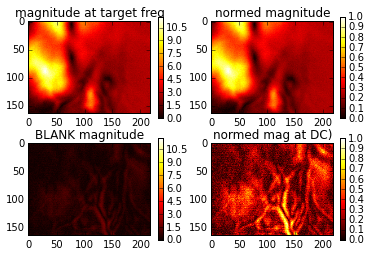

In [1472]:
# Checkout the threshold map...

plt.subplot(2,2,1)
plt.imshow(mag_map, vmin=0, vmax=mag_map.max(), cmap='hot') 
plt.title('magnitude at target freq')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(normed_mag_map, vmin=0, vmax=1, cmap='hot')
plt.title('normed magnitude')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(thresh_map,  vmin=0, vmax=mag_map.max(), cmap='hot')
if thresh_method=='DC':
    plt.title('DC magnitude')
elif thresh_method=='blank':
    plt.title('BLANK magnitude')
elif thresh_method=='magmax':
    plt.title('magnitude map')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(normed_thresh_map, vmin=0, vmax=1, cmap='hot')
plt.title('normed mag at DC)')
plt.colorbar()

Target_fft_CCW_run1_(1, 1)_.pkl


<matplotlib.colorbar.Colorbar instance at 0x7f595e577cf8>

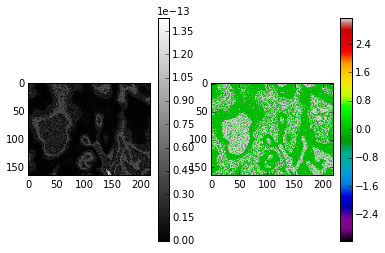

In [1473]:
# CHECKOUT DC MAG:

print curr_key

DC_mag_map = D[curr_key]['DC_mag']/Ny
DC_phase_map = D[curr_key]['DC_phase']

plt.subplot(1,2,1)
plt.imshow(DC_mag_map, cmap='gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(DC_phase_map, cmap='spectral', vmin=-1*math.pi, vmax=1*math.pi)
plt.colorbar()

Target_fft_CCW_run1_(1, 1)_.pkl


<matplotlib.colorbar.Colorbar instance at 0x7f595e2f19e0>

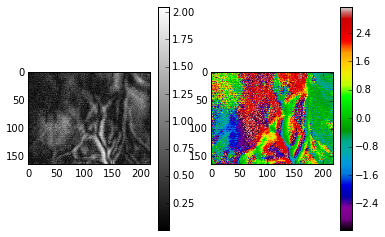

In [1474]:
# CHECKOUT BLANK MAG:

print curr_key

blank_mag_map = D[blank_key]['mag_map']/Ny
blank_phase_map = D[blank_key]['phase_map']

plt.subplot(1,2,1)
plt.imshow(blank_mag_map, cmap='gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(blank_phase_map, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.colorbar()

(164, 218)
Target_fft_CCW_run1_(1, 1)_.pkl
4612.5
/media/nas/volume1/widefield/data/JR014W/20160722/JR014W_circle_013Hz/structs/CCW_magnitude_map_.png


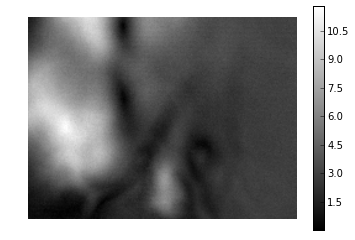

In [1475]:
# PLOT:  magnitude map
ft = D[curr_key]['ft']
print ft.shape
print curr_key

mag_map = D[curr_key]['mag_map']

N = len(D[curr_key]['positions'])
Ny = N / 2.
print Ny

norm_mag_map = np.empty(mag_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
        norm_mag_map[x, y] = 2 * mag_map[x, y] / Ny
        # Q:  is this diff, depending on whether take abs(full_ft_seq) vs. abs(HALF_seq)? if so, can't just div by 2 here
        # CHECK RAW on "stack"
        
# plt.imshow(norm_mag_map, cmap='gray')
plt.imshow(mag_map/Ny, cmap='gray')
plt.colorbar()
plt.axis('off')

if CW:
    imname = 'CW_magnitude_map_%s' % append
else:
    imname = 'CCW_magnitude_map_%s' % append
    
    

impath = os.path.join(outdir, imname+'.svg')
plt.savefig(impath, format='svg', dpi=1200)

impath = os.path.join(outdir, imname+'.png')
plt.savefig(impath, format='png')


print impath

<matplotlib.colorbar.Colorbar instance at 0x7f595d995758>

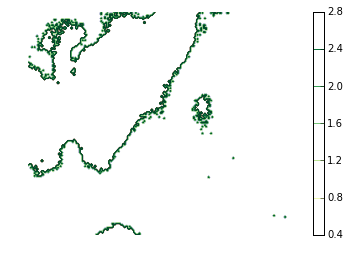

In [1480]:
plt.contour(np.angle(phase_map)) #, cmap='bwr_r', alpha=1)
plt.contour(np.angle(phase_map), cmap='YlGn', alpha=1)
plt.axis('off')
plt.colorbar()

In [54]:
# How does this compare to time-domain?

# imdir = '/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013_REV/stimulus'
imdir = '/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013/stimulus'

# imdir = '/media/nas/volume1/widefield/data/CE009/20160615/circle_0013Hz_CCW/stimulus'
# imdir = os.path.join(os.path.split(outdir)[0], 'stimulus')

imdir = os.path.join(os.path.split(outdir)[0], 'stimulus')


files = os.listdir(imdir)
print len(files)
files = sorted([f for f in files if os.path.splitext(f)[1] == str(im_format)])
print len(files)

9231
9231


In [55]:
# Read in stack:
print imdir
tiff = TIFF.open(os.path.join(imdir, files[0]), mode='r')
sample = tiff.read_image().astype('float')
print "sample type: %s, range: %s" % (sample.dtype, str([sample.max(), sample.min()]))
print "sample shape: %s" % str(sample.shape)
tiff.close()

stack = np.empty((sample.shape[0], sample.shape[1], len(files)))

for i, f in enumerate(files):

    if i % 1000 == 0:
        print('%d images processed...' % i)
    tiff = TIFF.open(os.path.join(imdir, f), mode='r')
    im = tiff.read_image().astype('float')
    tiff.close()
    
    stack[:, :, i] = im


/media/nas/volume1/widefield/data/CE004/20160203/awake_circle_0013/stimulus
sample type: float64, range: [1474.0, 75.0]
sample shape: (164, 218)
0 images processed...
1000 images processed...
2000 images processed...
3000 images processed...
4000 images processed...
5000 images processed...
6000 images processed...
7000 images processed...
8000 images processed...
9000 images processed...


In [56]:
# GET cycle starts:
# CW = True

positions = [re.findall("\[([^[\]]*)\]", f) for f in files]
plist = list(itertools.chain.from_iterable(positions))
pos = []
for i in plist:
    split_string = i.split(' ')
    split_num = [float(s) for s in split_string if s is not '']
    pos.append([split_num[0], split_num[1]])

degs = [cart2pol(p[0], p[1], units='deg') for p in pos]

degrees = [i[0] for i in degs]
shift_degrees = [i[0] for i in degs]
for x in range(len(shift_degrees)):
    if shift_degrees[x] < 0:
        shift_degrees[x] += 360.
        
CW = False
if CW is True:
    find_cycs = list(itertools.chain.from_iterable(np.where(np.diff(shift_degrees) > 0)))
else:
    find_cycs = list(itertools.chain.from_iterable(np.where(np.diff(shift_degrees) < 0)))


print find_cycs
strt_idxs = [i + 1 for i in find_cycs]
strt_idxs.append(0)
strt_idxs.append(len(positions))
strt_idxs = sorted(strt_idxs)
nframes_per_cycle = [strt_idxs[i] - strt_idxs[i - 1] for i in range(1, len(strt_idxs))]
print nframes_per_cycle

[460, 922, 1383, 1845, 2306, 2768, 3230, 3691, 4153, 4614, 5076, 5537, 5999, 6460, 6922, 7384, 7845, 8307, 8768]
[461, 462, 461, 462, 461, 462, 462, 461, 462, 461, 462, 461, 462, 461, 462, 462, 461, 462, 461, 462]


In [57]:
# create separate copy of stack:
# del S/
import copy
S = copy.deepcopy(stack)


<matplotlib.colorbar.Colorbar instance at 0x7fd0fd5f4f38>

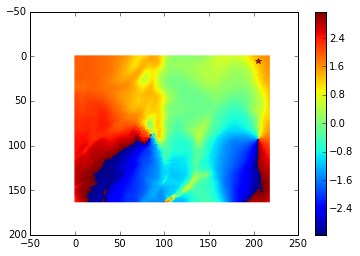

In [58]:

plt.imshow(D[curr_key]['phase_map'])

# x = 80
# y = 100
# plt.plot(x, y, 'w*')

# x = 60
# y = 130
# plt.plot(x, y, 'r*')

x=205
y=5
plt.plot(x, y, 'r*')

plt.colorbar()


In [22]:
print outdir
print D.keys(), curr_key

fig = plt.figure()
data = D[curr_key]['phase_map']

# ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
# ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

x = np.arange(data.shape[0])+0.5
y = np.arange(data.shape[1])+0.5
z = []
for i in range(data.shape[0]):
    z.append(data[i,:])

zflip = np.flipud(z)

from plotly.graph_objs import *

data = Data([
    Contour(
        z=zflip
    )
])
# plot_url = plot(data, filename='simple-contour')

import plotly.plotly as py
py.iplot(data)

/media/nas/volume1/widefield/data/JR002B/20160616/circle_0013Hz_CCW/structs
['Target_fft_stimulus_(1, 1)_.pkl'] Target_fft_stimulus_(1, 1)_.pkl


/media/nas/volume1/widefield/data/JR002B/20160616/circle_0013Hz_CW2/structs/CW_magnitude_map_.jpg


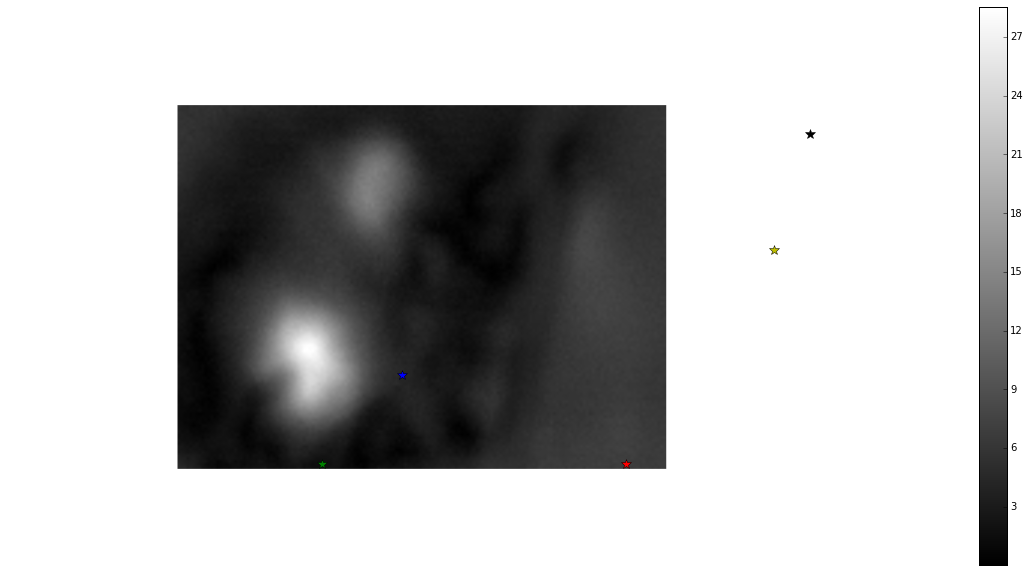

In [182]:
# MAKE A FIGURE WITH LCOS:

Ny = len(D[curr_key]['freqs'])/2.
fig = plt.figure(figsize=(20,10))

mag_map = D[curr_key]['mag_map']

plt.imshow(mag_map/Ny, cmap='gray')
plt.colorbar()

# CW_detrend_first: 
# good @ x=120, y=180
# medium @ x=120, y=48
# bad @ x=80, y=80

# GOOD CE004:
# x=90#120
# y=75##48 #180

# xlocs = [120, 120, 90, 9, 48]
# ylocs = [180, 48, 75, 212, 200]

# CE009:
xlocs = [120, 120, 90, 9, 48]
ylocs = [150, 48, 75, 212, 200]
colors = ['r', 'g', 'b', 'k', 'y']

for i in range(len(xlocs)):
    plt.plot(ylocs[i], xlocs[i], colors[i]+'*', markersize=10)
plt.axis('off')

if CW:
    imname = 'mag_locs_CW_pixel_x%i_y%i_%s_MAP_small' % (xlocs[-1], ylocs[-1], append)
else:
    imname = 'mag_locs_CCW_pixel_x%i_y%i_%s_MAP_small' % (xlocs[-1], ylocs[-1], append)
    
# impath = os.path.join(outdir, imname+'.svg')
# plt.savefig(impath, format='svg', dpi=1200)

# impath = os.path.join(outdir, imname+'.jpg')
# plt.savefig(impath, format='jpg')

print impath


NameError: name 'onpick2' is not defined

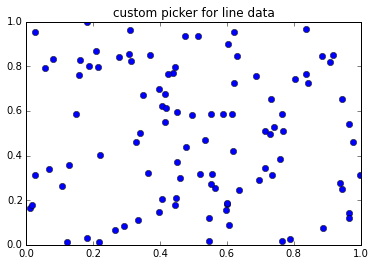

In [191]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('custom picker for line data')
# imshow(mag_map/Ny, cmap='gray')
# line, = ax1.plot(rand(100), rand(100), 'o', picker=line_picker)
line, = ax1.plot(np.random.rand(100), np.random.rand(100), 'o', picker=5)

fig.canvas.mpl_connect('pick_event', onpick2)

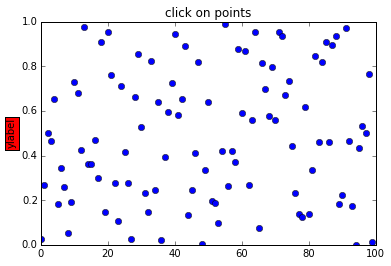

In [197]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.text import Text
from matplotlib.image import AxesImage
import numpy as np
from numpy.random import rand

if 1:
    fig, ax = plt.subplots()
    ax.set_title('click on points', picker=True)
    ax.set_ylabel('ylabel', picker=True, bbox=dict(facecolor='red'))
    line, = ax.plot(rand(100), 'o', picker=5)

    def onpick1(event):
        if isinstance(event.artist, Line2D):
            thisline = event.artist
            xdata = thisline.get_xdata()
            ydata = thisline.get_ydata()
            ind = event.ind
#             print 'X=', str(np.take(xdata, ind)[0]) # Print X point
#             print 'Y=', str(np.take(ydata, ind)[0]) # Print Y point
            print('X='+str(np.take(xdata, ind)[0]))

    fig.canvas.mpl_connect('pick_event', onpick1)

(122, 164)


NameError: name 'xlocs' is not defined

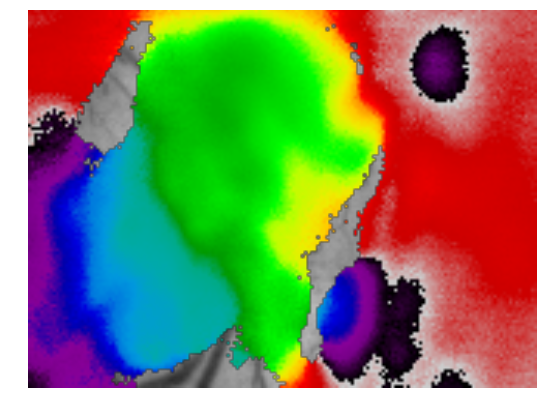

In [24]:
use_mean_intensity = 0 # set to 1 if want to threshold with mean intensity values instead of magnitude
use_log = 1
threshold = 0.3
Ny = len(D[curr_key]['freqs'])/2.
mag_map = D[curr_key]['mag_map']/Ny
phase_map = D[curr_key]['phase_map']

#-----------------------------------------------------------------
# Overlaid Phase-map, thresholded
#-----------------------------------------------------------------

fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,2,1)
plt.imshow(surface,cmap=cm.Greys_r)
print surface.shape

if use_mean_intensity:
    mean_intensity = D[curr_key]['mean_intensity']
    [x, y] = np.where(mean_intensity >= threshold*mean_intensity.max())
    phase_mask = np.ones(mean_intensity.shape) * 100
    # phase_mask[x, y] = phase_map[x, y]
    phase_mask[x, y] = D[curr_key]['phase_map'][x, y]
    tit = 'Threshold, %.2f of mean intensity max' % (threshold)

else:
    if use_log:
        [x, y] = np.where(np.log(mag_map) >= threshold * np.log(mag_map.max()))
    else:
        [x, y] = np.where(mag_map >= threshold * mag_map.max())
    phase_mask = np.ones(mag_map.shape) * 100
    phase_mask[x, y] = phase_map[x, y]
    tit = 'Threshold, %.2f of log max magnitude' % (threshold)

[nullx, nully] = np.where(phase_mask == 100)
phase_mask[nullx, nully] = np.nan
phase_mask = np.ma.array(phase_mask)
plt.imshow(phase_mask, cmap='spectral', vmin=-1*math.pi, vmax=math.pi)
plt.axis('off')


# #-----------------------------------------------------------------
# # LEGEND
# #-----------------------------------------------------------------

# ax = fig.add_subplot(1,2,2, projection='polar')
# ax.set_theta_zero_location('W') # W puts 0 on RIGHT side...

# if CW:
#     ax._direction = 2*np.pi # object moves toward bottom first (CW)
# else:
#     ax._direction = -2*np.pi # objecct moves toward top first (CCW)

# norm = mpl.colors.Normalize(vmax=1*np.pi, vmin=-1*np.pi)
# #norm = mpl.colors.Normalize(vmax=2*np.pi, vmin=0)
# cb = mpl.colorbar.ColorbarBase(ax, cmap=cm.get_cmap('spectral'),
#                                 norm=norm, orientation='horizontal')
# # cb.ax.invert_xaxis()
# # cb.outline.set_visible(False)
# # ax.set_axis_off()
# ax.set_rlim([-1, 1])
# ax.axis('off')

# if CW:
#     imname = 'CW_phase_overlay_withkey_threshold%.2f' % threshold
# else:
#     imname = 'CCW_phase_overlay_withkey_threshold%.2f' % threshold
# impath = os.path.join(outdir, imname+'.eps')
# plt.savefig(impath, format='svg', dpi=1200)

# impath = os.path.join(outdir, imname+'.jpg')
# plt.savefig(impath, format='jpg')


# print impath

# xlocs = [120, 120, 90, 9, 48]
# ylocs = [180, 48, 75, 212, 200]
colors = ['r', 'g', 'b', 'k', 'y']
for i in range(len(xlocs)):
    plt.plot(ylocs[i], xlocs[i], colors[i]+'*', markersize=10)
plt.axis('off')

# if CW:
#     imname = 'phase_locs_overlaymask_CW_pixel_x%i_y%i_%s_MAP_small' % (xlocs[-1], ylocs[-1], append)
# else:
#     imname = 'phase_locs_overlaymask_CCW_x%i_y%i_%s_MAP+_small' % (xlocs[-1], ylocs[-1], append)
    
# impath = os.path.join(outdir, imname+'.svg')
# plt.savefig(impath, format='svg', dpi=1200)

# impath = os.path.join(outdir, imname+'.jpg')
# plt.savefig(impath, format='jpg')

print impath


[ 1141.  1103.  1109. ...,  1099.  1109.  1095.]
/media/nas/volume1/widefield/data/CE004/20160203/FIG_CCW_phase.png


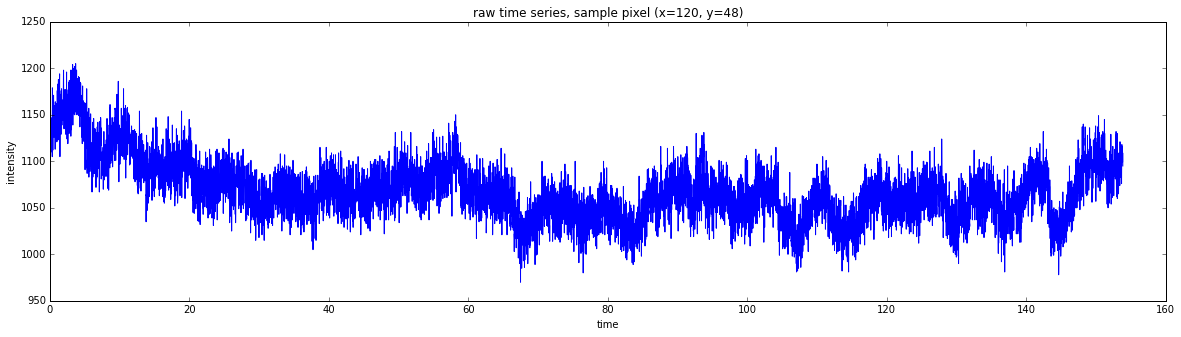

In [66]:
# Check out 1 pix:
fig = plt.figure(figsize=(20,5))

# xlocs = [120, 120, 90, 9, 48]
# ylocs = [180, 48, 75, 212, 200]
# colors = ['r', 'g', 'b', 'k', 'y']

# x = 120 #9 #48 #9 #90#120
# y = 180 #212 #200 #209 #75 #48 #180

x = 120 #120
y = 48 #150

pix = S[x, y, :] #stack[x, y, :]

N = len(pix)
target_freq = 0.13
sampling_rate = 60.
dt = 1 / sampling_rate

time = 1 / sampling_rate * np.arange(N)
freqs = fft.fftfreq(len(pix), 1 / sampling_rate)

plt.plot(time, pix)

plt.xlabel('time')
plt.ylabel('intensity')
plt.title('raw time series, sample pixel (x=%i, y=%i)' % (x, y))

print pix


# if CW:
#     imname = 'CW_pixel_x%i_y%i_%s_raw' % (x, y, append)
# else:
#     imname = 'CCW_pixel_x%i_y%i_%s_raw' % (x, y, append)
    
# impath = os.path.join(outdir, imname+'.svg')
# plt.savefig(impath, format='svg', dpi=1200)

# impath = os.path.join(outdir, imname+'.jpg')
# plt.savefig(impath, format='jpg')

print impath

In [67]:
# Normalizing steps:
# del S
# stack = copy.deepcopy(S)

print "detrending..."

for x in range(sample.shape[0]):
    for y in range(sample.shape[1]):

        # THIS IS BASICALLY MOVING AVG WINDOW...
        pix = scipy.signal.detrend(stack[x, y, :], type='constant') # HP filter - over time...

        stack[x, y, :] = pix

# print "mean subtracting..."
# for i in range(stack.shape[2]):
#     stack[:,:,i] -= np.mean(stack[:,:,i].ravel()) 


detrending...


/media/nas/volume1/widefield/data/CE004/20160203/FIG_CCW_phase.png


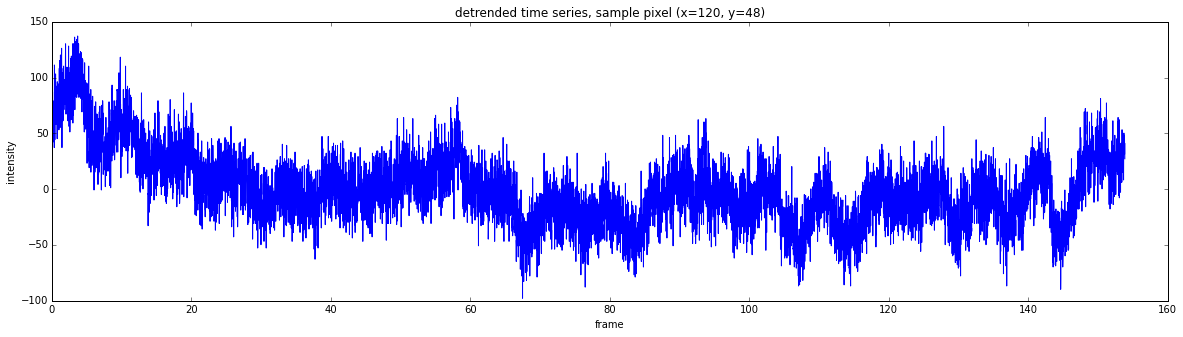

In [68]:
# # detrend first??


fig = plt.figure(figsize=(20,5))
x = 120 #9 #48 #9 #90#120 #60
y = 48 #180 #212 #200 #209 #75#48#150 #130
pix = stack[x, y, :]

N = len(pix)
target_freq = 0.13
sampling_rate = 60.
dt = 1 / sampling_rate

time = 1 / sampling_rate * np.arange(N)
freqs = fft.fftfreq(len(pix), 1 / sampling_rate)


# plt.plot(time[0:5000], p[0:5000])
plt.plot(time, pix)

plt.xlabel('frame')
plt.ylabel('intensity')
plt.title('detrended time series, sample pixel (x=%i, y=%i)' % (x, y))


# if CW:
#     imname = 'CW_pixel_x%i_y%i_%s_detrendedlast' % (x, y, append)
# else:
#     imname = 'CCW_pixel_x%i_y%i_%s_detrendedlast' % (x, y, append)
    
# impath = os.path.join(outdir, imname+'.svg')
# plt.savefig(impath, format='svg', dpi=1200)

# impath = os.path.join(outdir, imname+'.png')
# plt.savefig(impath, format='png')

print impath

In [69]:

print "mean subtracting..."
for i in range(stack.shape[2]):
    stack[:,:,i] -= np.mean(stack[:,:,i].ravel()) 


mean subtracting...


[0, 461, 923, 1384, 1846, 2307, 2769, 3231, 3692, 4154, 4615, 5077, 5538, 6000, 6461, 6923, 7385, 7846, 8308, 8769, 9231]
[0, 461, 923, 1384, 1846, 2307, 2769, 3231, 3692, 4154, 4615, 5077, 5538, 6000, 6461, 6923, 7385, 7846, 8308, 8769]


(0, 9300)

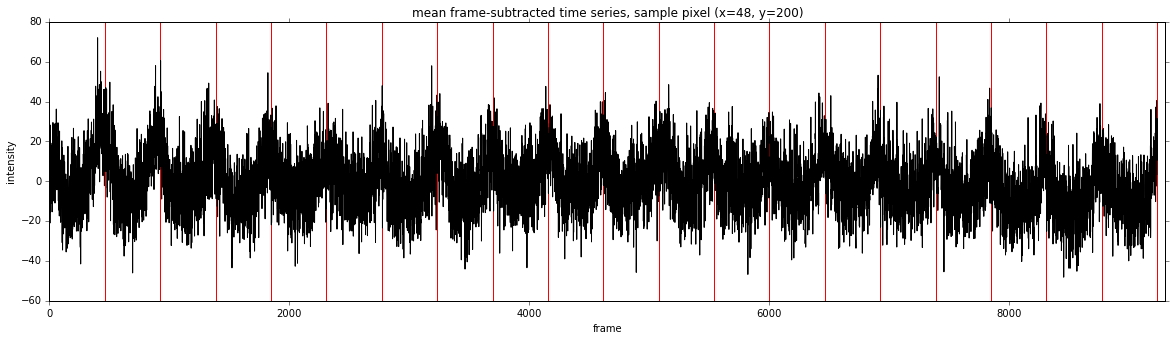

In [115]:
fig = plt.figure(figsize=(20,5))

# CE004 -- CCW:
# x = 120 #9 #48 #9 #90#120
# y = 180 #212 #200 #209 #75#48#180

x = 48 #9 #48 #9 #90#120
y = 200 #212 #200 #209 #75#48#180

p = stack[x, y, :]
# plt.plot(time, p)
# plt.plot(range(len(p)), p, 'k')

plt.xlabel('frame')
plt.ylabel('intensity')
plt.title('mean frame-subtracted time series, sample pixel (x=%i, y=%i)' % (x, y))

print strt_idxs
ncycles = 20

# plt.figure()
ax = plt.subplot(1,1,1)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')

idxs = strt_idxs[0:ncycles]
print idxs
for i in strt_idxs:
	plt.axvline(i,color='r')

    
time = 1 / sampling_rate * np.arange(N)
freqs = fft.fftfreq(len(pix), 1 / sampling_rate)

plt.plot(range(len(p)), p, 'k')

plt.xlim([0, 9300])

# ax.axis('off')

# imname = 'CCW_pixel_x%i_y%i_%s_detrended_meansub_axes' % (x, y, append)

# savedir = '/media/nas/volume1/widefield/data/CE004/20160203/'

# impath = os.path.join(savedir, imname+'.png')
# plt.savefig(impath, format='png')
# # plt.savefig(impath, format='svg', dpi=1200)
# print impath


# ax.tick_params(axis='y', direction='out')


# if CW: # i.e., this is PRE detrending, since detrending is last...
#     imname = 'CW_pixel_x%i_y%i_%s_detrendedlast_meansub' % (x, y, append)
# else:
#     imname = 'CCW_pixel_x%i_y%i_%s_detrendedfirst_meansub' % (x, y, append)
    
# impath = os.path.join(outdir, imname+'.svg')
# plt.savefig(impath, format='svg', dpi=1200)

# impath = os.path.join(outdir, imname+'.png')
# plt.savefig(impath, format='png')

# print impath

# print "PHASE: ", phase_map[x, y]

In [87]:

print "detrending..."

for x in range(sample.shape[0]):
    for y in range(sample.shape[1]):

        # THIS IS BASICALLY MOVING AVG WINDOW...
        pix = scipy.signal.detrend(stack[x, y, :], type='constant') # HP filter - over time...

        stack[x, y, :] = pix


detrending...


/media/nas/volume1/widefield/data/CE004/20160203/PWR_pixel_x48_y200.svg


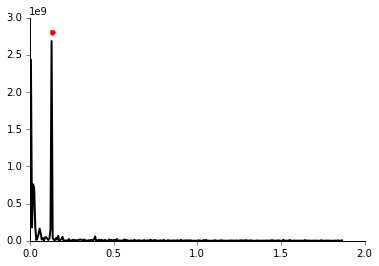

In [185]:
pix_fft = fft.fft(pix)
Ny = len(D[curr_key]['freqs'])/2.


N = len(pix_fft)
xF = pix_fft[0:N/2]
fps=60.
fr = np.linspace(0,fps/2,N/2)

pix_power = np.abs(pix_fft)**2 #/Ny
# plt.plot(fr[0:100], pix_power[0:N/2][0:100])
# # plt.axis('off')


ax = plt.subplot(1,1,1)

ax.plot(freqs[0:N/32], pix_power[0:N/32], 'k', linewidth=2)
ax.plot(freqs[20], 2.8E9, 'r.', markersize=10)
# plt.axis('off')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')

imname = 'PWR_pixel_x%i_y%i' % (x, y)

savedir = '/media/nas/volume1/widefield/data/CE004/20160203/'

impath = os.path.join(savedir, imname+'.svg')
# plt.savefig(impath, format='png')
plt.savefig(impath, format='svg') #, dpi=1200)
print impath



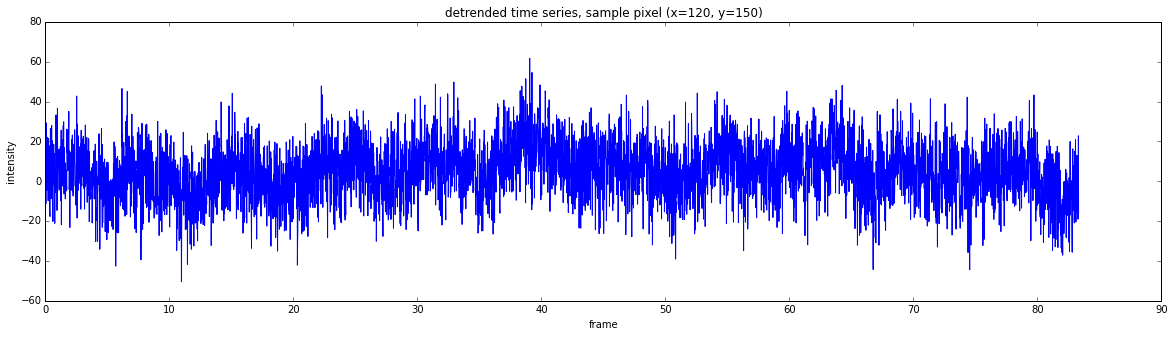

In [93]:
fig = plt.figure(figsize=(20,5))
x = 120 #60
y = 150 #130
p = stack[x, y, :]
plt.plot(time[0:5000], p[0:5000])
plt.xlabel('frame')
plt.ylabel('intensity')
plt.title('detrended time series, sample pixel (x=%i, y=%i)' % (x, y))


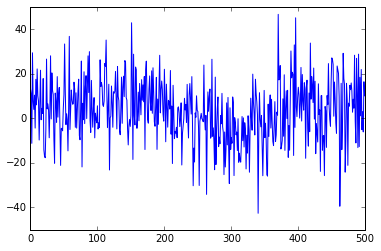

In [94]:
fig = plt.figure()
# fig.add_subplot(1,2,1)
# plt.plot(range(N), p)
# for i in strt_idxs:
# 	plt.axvline(i,color='r')
    
# fig.add_sublot(1,2,2)
plt.plot(range(N)[0:500], p[0:500])

[0, 461, 922, 1384, 1845, 2307, 2768, 3230, 3691, 4153, 4615, 5076, 5538, 5999, 6461, 6922, 7384, 7845, 8307, 8769, 9230]
[0, 461, 922, 1384, 1845, 2307, 2768, 3230, 3691, 4153, 4615, 5076, 5538, 5999, 6461, 6922, 7384, 7845, 8307, 8769]


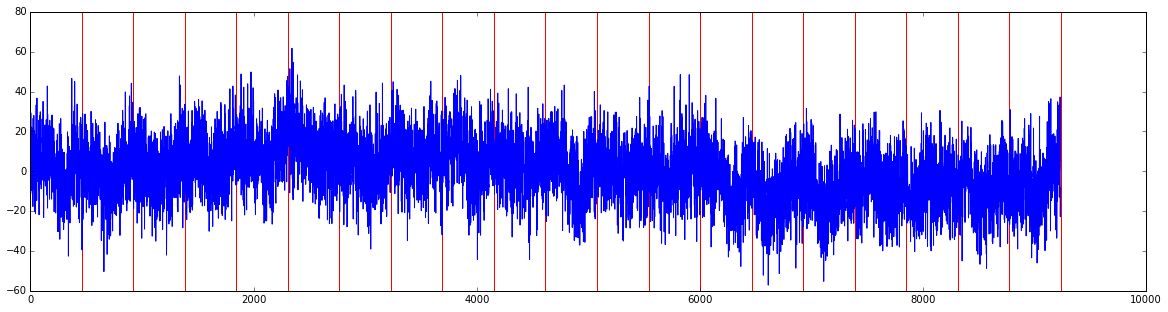

In [97]:
# Get histo of range of intensity values:

fig = plt.figure(figsize=(20,5))
print strt_idxs
ncycles = 20

idxs = strt_idxs[0:ncycles]
print idxs
for i in strt_idxs:
	plt.axvline(i,color='r')
plt.plot(range(N), p)
# intensities = [i for i in p if i>=0]
# np.histogram()

In [91]:
from plotly.offline import plot
import plotly.plotly as py

fig = plt.figure()
plt.plot(range(N), p)
for i in strt_idxs:
	plt.axvline(i,color='r')
    
py.iplot_mpl(fig, strip_style = True, filename='ipython/mpl_example')

In [17]:
print cw_key

Target_fft_stimulus_(1, 1)_detrendfirst.pkl


mag range:  0.0285461849073 12.6046364569
phase range:  -3.1415801577 3.14142959823
HUE range:  1.98878262431e-06 0.999974048933
VAL range:  0.0 1.0
0.0
1.0


<matplotlib.colorbar.Colorbar instance at 0x7f5964ef7710>

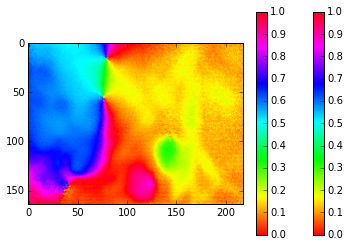

In [1373]:

# curr_key = cw_key

Ny = len(D[curr_key]['freqs'])/2.
fig = plt.figure()
mag_map = D[curr_key]['mag_map'] / Ny
phase_map = D[curr_key]['phase_map']

print "mag range: ", mag_map.min(), mag_map.max()
print "phase range: ", phase_map.min(), phase_map.max()

old_min = -math.pi #phase_map.min()
old_max = math.pi #phase_map.max()
new_min = 0
new_max = 1
normed_phase_map = np.zeros(phase_map.shape)
for x in range(phase_map.shape[0]):
    for y in range(phase_map.shape[1]):
        old_val = phase_map[x, y]
        normed_phase_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min

old_min = mag_map.min()
old_max = mag_map.max()
new_min = 0
new_max = 1
normed_mag_map = np.zeros(mag_map.shape)
for x in range(mag_map.shape[0]):
    for y in range(mag_map.shape[1]):
        old_val = mag_map[x, y]
        normed_mag_map[x, y] = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min


hue = normed_phase_map
sat = np.ones(hue.shape)
val = normed_mag_map
print "HUE range: ", hue.min(), hue.max()
print "VAL range: ", val.min(), val.max()

HSV = np.ones(val.shape + (3,))
HSV[...,0] = hue
HSV[...,2] = sat * 1
HSV[...,1] = val

plt.imshow(normed_phase_map, cmap='hsv')
plt.colorbar()

print normed_mag_map.min()
print normed_mag_map.max()


##
# import copy
# cutoff = .3*max(normed_mag_map.ravel())
# print "Cutoff at: ", cutoff
# thresh_val = copy.deepcopy(val)
# nons = []
# for x in range(thresh_val.shape[0]):
#     for y in range(thresh_val.shape[1]):

#         if val[x, y] < cutoff:
            
#             nons.append([x,y])
# print len(nons)

# ##
# # HSV TO RGB:

# import colorsys
# convmap = np.empty(HSV.shape)

# for i in range(HSV.shape[0]):
#     for j in range(HSV.shape[1]):

#             convmap[i, j, :] = colorsys.hsv_to_rgb(HSV[i,j,:][0], HSV[i,j,:][1], HSV[i,j,:][2])
# print "HSV range: ", HSV.min(), HSV.max()
# print convmap[i,j,:]
# print convmap.min()

# ##
# # MASK:

# alpha_channel = np.ones(convmap[:,:,1].shape)
# print alpha_channel.shape
# for i in nons:
#     alpha_channel[i[0], i[1]] = 0

# composite = np.empty((alpha_channel.shape[0], alpha_channel.shape[1], 4))
# composite[:,:,0:3] = convmap[:,:,:]

# composite[:,:,3] = alpha_channel

# plt.imshow(surface, 'gray')
# plt.imshow(composite, 'hsv')
# plt.axis('off')
plt.colorbar()

In [1374]:
import copy
cutoff = .3*max(normed_mag_map.ravel())
print "Cutoff at: ", cutoff
thresh_val = copy.deepcopy(val)
nons = []
for x in range(thresh_val.shape[0]):
    for y in range(thresh_val.shape[1]):

        if val[x, y] < cutoff:
            
            nons.append([x,y])
print len(nons)

Cutoff at:  0.3
23009


In [1375]:
# HSV TO RGB:

import colorsys
convmap = np.empty(HSV.shape)

for i in range(HSV.shape[0]):
    for j in range(HSV.shape[1]):

            convmap[i, j, :] = colorsys.hsv_to_rgb(HSV[i,j,:][0], HSV[i,j,:][1], HSV[i,j,:][2])
print "HSV range: ", HSV.min(), HSV.max()
print convmap[i,j,:]
print convmap.min()

HSV range:  0.0 1.0
[ 1.          0.96908366  0.86941071]
0.0


(164, 218)


<matplotlib.colorbar.Colorbar instance at 0x7f5965b33ef0>

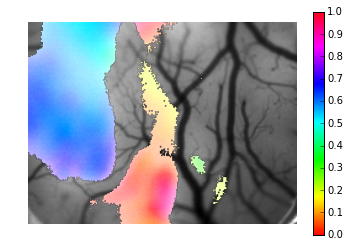

In [1377]:
# MASK:

alpha_channel = np.ones(convmap[:,:,1].shape)
print alpha_channel.shape
for i in nons:
    alpha_channel[i[0], i[1]] = 0

composite = np.empty((alpha_channel.shape[0], alpha_channel.shape[1], 4))
composite[:,:,0:3] = convmap[:,:,:]

composite[:,:,3] = alpha_channel

plt.imshow(surface, 'gray')
plt.imshow(composite, 'hsv')
plt.axis('off')
plt.colorbar()